<a href="https://colab.research.google.com/github/het1752/machine-learning/blob/main/Credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset Link:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

About Dataset

Context

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

Update (03/05/2021)

A simulator for transaction data has been released as part of the practical handbook on Machine Learning for Credit Card Fraud Detection - https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html. We invite all practitioners interested in fraud detection datasets to also check out this data simulator, and the methodologies for credit card fraud detection presented in the book.

Acknowledgements

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('/content/creditcard.csv')
data.head(),data.tail()

(   Time        V1        V2        V3        V4        V5        V6        V7  \
 0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 
         V26      

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11959 entries, 0 to 11958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    11959 non-null  int64  
 1   V1      11959 non-null  float64
 2   V2      11959 non-null  float64
 3   V3      11959 non-null  float64
 4   V4      11959 non-null  float64
 5   V5      11959 non-null  float64
 6   V6      11959 non-null  float64
 7   V7      11959 non-null  float64
 8   V8      11959 non-null  float64
 9   V9      11959 non-null  float64
 10  V10     11959 non-null  float64
 11  V11     11959 non-null  float64
 12  V12     11959 non-null  float64
 13  V13     11959 non-null  float64
 14  V14     11959 non-null  float64
 15  V15     11959 non-null  float64
 16  V16     11959 non-null  float64
 17  V17     11959 non-null  float64
 18  V18     11959 non-null  float64
 19  V19     11959 non-null  float64
 20  V20     11958 non-null  float64
 21  V21     11958 non-null  float64
 22

In [8]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,11959.000000,...,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000,11958.000000
mean,8009.996822,-0.216230,0.277097,0.889505,0.282606,-0.086585,0.139986,-0.121943,-0.048727,0.911579,...,-0.061474,-0.153850,-0.033709,0.017113,0.104794,0.062891,0.008320,0.000271,62.352617,0.004349
std,6204.332248,1.583914,1.308884,1.331824,1.478162,1.191776,1.306285,1.153899,1.246823,1.192349,...,0.918705,0.626631,0.505355,0.591394,0.429413,0.561603,0.405100,0.261230,178.247010,0.065803
min,0.000000,-27.670569,-34.607649,-22.804686,-4.657545,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-19.254328,-2.512377,-4.781606,-1.338556,-7.976100,-3.575312,0.000000,0.000000
25%,2542.000000,-0.978944,-0.261503,0.417186,-0.622456,-0.688114,-0.622521,-0.591335,-0.185243,0.196741,...,-0.268151,-0.543613,-0.171833,-0.333251,-0.144092,-0.353864,-0.080064,-0.015461,5.000000,0.000000
50%,6662.000000,-0.340742,0.256346,0.951223,0.213029,-0.183847,-0.146903,-0.094876,0.013616,0.894911,...,-0.130062,-0.124900,-0.044299,0.072099,0.143136,0.001972,-0.003039,0.015452,15.950000,0.000000
75%,12382.000000,1.161273,0.883626,1.613678,1.159141,0.346298,0.508432,0.431657,0.267560,1.589120,...,0.021687,0.234029,0.075686,0.401798,0.380076,0.409231,0.106344,0.073171,50.000000,0.000000
max,20642.000000,1.960497,9.092123,4.101716,11.927512,34.099309,21.393069,34.303177,5.499963,10.392889,...,22.614889,4.534454,13.876221,3.200201,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [9]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

**There is some null value so replace karte hai median se...**

In [11]:
v20meadian=data.V20.median()
v21meadian=data.V21.median()
v22meadian=data.V22.median()
v23meadian=data.V23.median()
v24meadian=data.V24.median()
v25meadian=data.V25.median()
v26meadian=data.V26.median()
v27meadian=data.V27.median()
v28meadian=data.V28.median()
amountmeadian=data.Amount.median()
classmeadian=data.Class.median()

In [12]:
data['V20'].fillna(v20meadian,inplace=True)
data['V21'].fillna(v21meadian,inplace=True)
data['V22'].fillna(v22meadian,inplace=True)
data['V23'].fillna(v23meadian,inplace=True)
data['V24'].fillna(v24meadian,inplace=True)
data['V25'].fillna(v25meadian,inplace=True)
data['V26'].fillna(v26meadian,inplace=True)
data['V27'].fillna(v27meadian,inplace=True)
data['V28'].fillna(v28meadian,inplace=True)
data['Amount'].fillna(amountmeadian,inplace=True)
data['Class'].fillna(classmeadian,inplace=True)

In [14]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
data.dtypes

Time        int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class     float64
dtype: object

In [16]:
data.Class.value_counts()

0.0    11907
1.0       52
Name: Class, dtype: int64

In [18]:
data.drop('Time',axis=1,inplace=True)

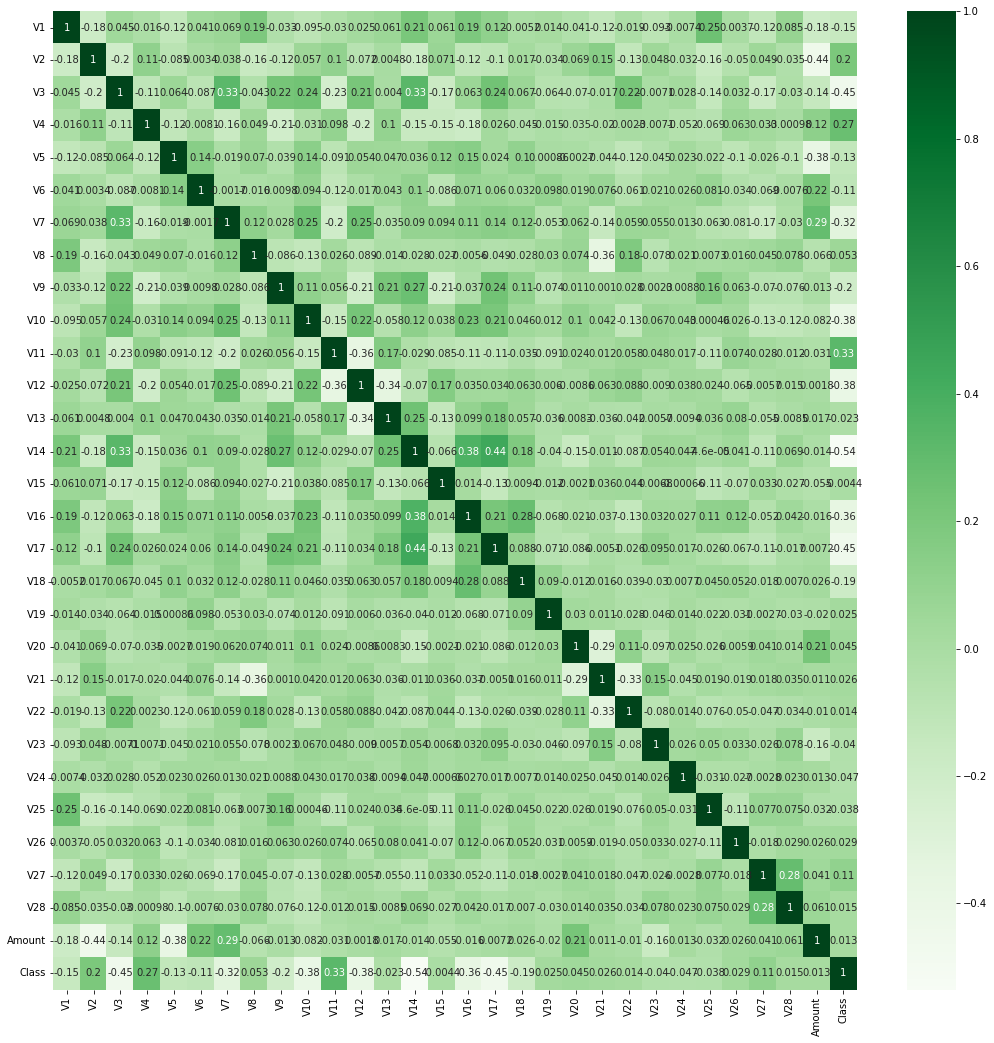

In [21]:
import seaborn as sns
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap='Greens')

In [24]:
x=data.drop('Class',axis=1)
y=data.Class

In [25]:
len(x),len(y)

(11959, 11959)

In [26]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [27]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
len(x_train),len(y_train),len(x_test),len(y_test)

(9567, 9567, 2392, 2392)

##Model

In [30]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
import sklearn
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)
pred_y1=model1.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y1))
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y1))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y1))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y1))

[[2379    3]
 [   1    9]]
Precision: 0.75
recall: 0.9
f1_score: 0.8181818181818182


In [32]:
# Randomforest
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()
model2.fit(x_train,y_train)
pred_y2=model2.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y2))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y2))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y2))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y2))

[[2382    0]
 [   1    9]]
Precision: 1.0
recall: 0.9
f1_score: 0.9473684210526316


In [35]:
#logistic regression
from sklearn.linear_model import LogisticRegression
model4 = LogisticRegression()
model4.fit(x_train,y_train)
pred_y4=model4.predict(x_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,pred_y4))
import sklearn
print('Precision:', sklearn.metrics.precision_score(y_test,pred_y4))
print('recall:', sklearn.metrics.recall_score(y_test,pred_y4))
print('f1_score:', sklearn.metrics.f1_score(y_test,pred_y4))

[[2378    4]
 [   1    9]]
Precision: 0.6923076923076923
recall: 0.9
f1_score: 0.7826086956521738


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
